# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Elvis | Nyarko | Elvis Kwaku Nyarko, 10/17/2024 | 20 | 25% |
| Member 2: | Barentu | Gobena | Barentu Gobena, 10/17/2024ure | 20 | 25% |
| Member 3: | Krunal | Pathak | Krunal Suresh Pathak, 10/17/2024 | 20 | 25% |
| Member 4: | Varshin | Gajapathy | Varshin Ganapathy Gajapathy, 10/17/2024 | 20 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

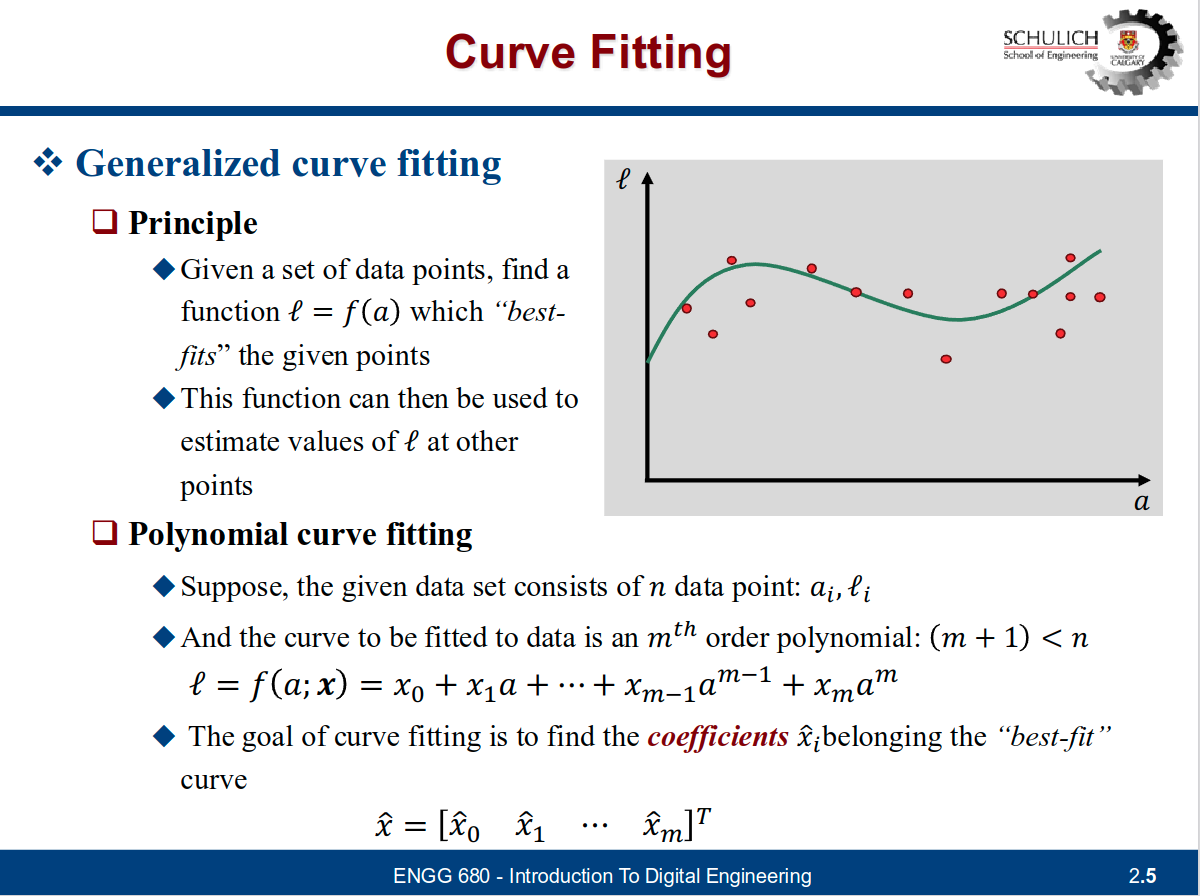

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSU_cD3zWoBX7uG3qTVfWT7Kpr5U9PoaYJIShMSU4_NkFfJ9F96NqcmiKqENeBNuA/pub?output=csv")
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data.iloc[:, 0].to_numpy()
l_var = df_data.iloc[:, 1].to_numpy()
l_true = df_data.iloc[:, 2].to_numpy()

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


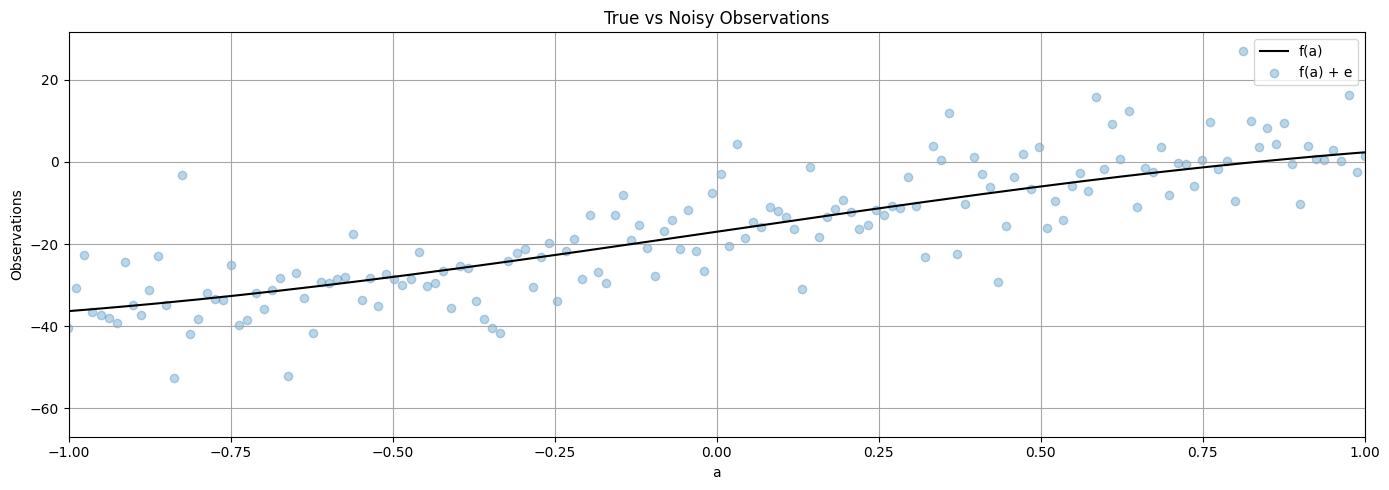

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

# Create a figure and axis for the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the true observations (l_true) using a line plot
ax.plot(a, l_true, label="f(a)", color='k')

# Plot the noisy observations (l) using a scatter plot
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

# Set the x-axis and y-axis labels
ax.set_xlabel("a")
ax.set_ylabel("Observations")

# Set the x-axis range to be from -1 to 1
ax.set_xlim(-1, 1)

# Add a title
ax.set_title("True vs Noisy Observations")

# Add a legend to differentiate between the two plots
ax.legend()

# Add grid lines
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

import numpy as np

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Step 1: Form the design matrix A (Vandermonde matrix for polynomial fitting)
    # Each column represents increasing powers of 'a' up to the specified degree
    A = np.vander(a, N=deg + 1, increasing=True)

    # Step 2: Apply the weight matrix P to the design matrix A and observations l
    # This ensures the weighted least squares fit is performed
    PA = P @ A
    Pl = P @ l

    # Step 3: Compute the normal equation (A^T * P * A) * x = (A^T * P * l)
    # This is the key step in the least squares estimation
    ATA_inv = np.linalg.inv(PA.T @ PA)  # Inverse of A^T * P * A
    x = ATA_inv @ (PA.T @ Pl)           # Estimated polynomial coefficients

    # Step 4: Calculate observation residuals: v = l - A * x
    v = l - A @ x

    # Step 5: Calculate a posteriori variance factor (goodness of fit)
    # apv = (v^T * P * v) / (n - deg - 1), where n is the number of observations
    n = len(l)
    apv = (v.T @ P @ v) / (n - deg - 1)

    # Step 6: Calculate the covariance matrix of the estimated coefficients
    # cov_x = apv * (A^T * P * A)^(-1)
    cov_x = apv * ATA_inv

    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

# Polynomial degrees to test
degrees = [1, 3, 5]

# Store results for each degree
results = {}

# Loop through each degree and call the fit_polynomial_curve function
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'apv': apv,
        'residuals': v
    }
    # Print results for each polynomial degree
    print(f"Degree {deg}:")
    print(f"Coefficients: {x}")
    print(f"A Posteriori Variance Factor (APV): {apv}")
    print(f"Residuals: {v}")
    print()


Degree 1:
Coefficients: [-16.59352348   7.25633807]
A Posteriori Variance Factor (APV): 162.74260861029938
Residuals: [ 2.31950929e+01  2.33624696e+01  5.16650748e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401632e+00 -2.04342769e+00
  8.45600372e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688442e+00  1.29373203e+01  6.55314294e+00  5.69877998e+00
  1.01514943e+01  4.53954123e+00  1.48752086e+01  9.72183415e+00
  5.32287382e+00  5.37717018e+00  3.28635164e+01  1.05508888e+01
  2.78273101e+01  9.16488365e+00  5.1

In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# For degree 1 (linear polynomial)
line_uw = np.polyval(np.flip(results[1]['coefficients']), a)

# For degree 3 (cubic polynomial)
cubic_uw = np.polyval(np.flip(results[3]['coefficients']), a)

# For degree 5 (quintic polynomial)
quintic_uw = np.polyval(np.flip(results[5]['coefficients']), a)


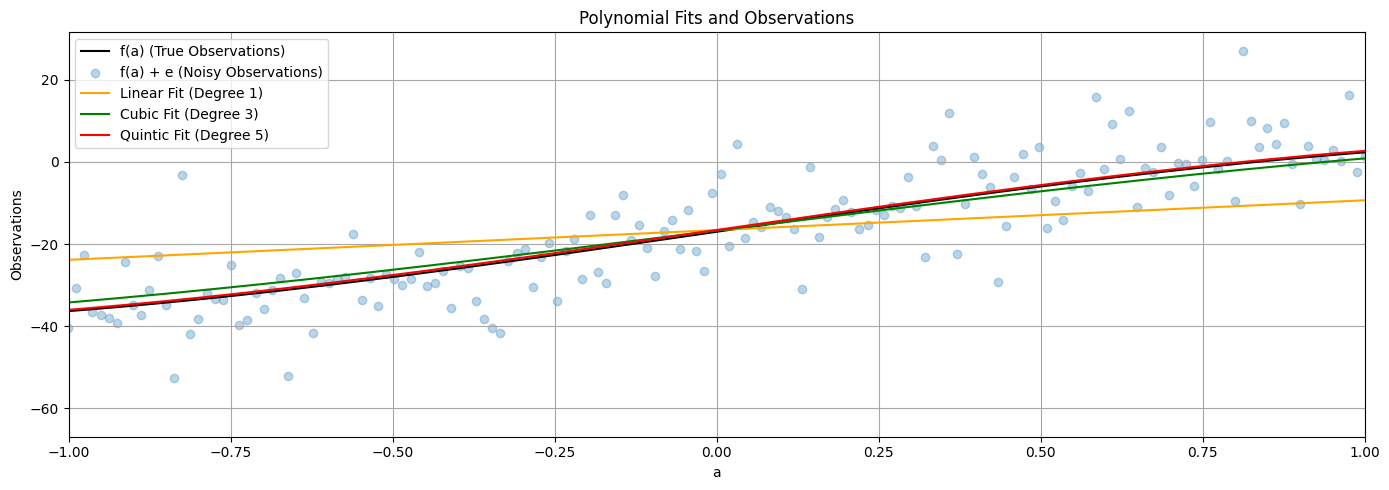

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Create a figure and axis for the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the true observations (l_true) as a black line
ax.plot(a, l_true, label="f(a) (True Observations)", color='k')

# Plot the noisy observations (l) as a scatter plot
ax.scatter(a, l, label="f(a) + e (Noisy Observations)", color='tab:blue', marker='o', alpha=0.3)

# Plot the polynomial fits
# Line polynomial (Degree 1) in orange
ax.plot(a, line_uw, label="Linear Fit (Degree 1)", color='orange')

# Cubic polynomial (Degree 3) in green
ax.plot(a, cubic_uw, label="Cubic Fit (Degree 3)", color='green')

# Quintic polynomial (Degree 5) in red
ax.plot(a, quintic_uw, label="Quintic Fit (Degree 5)", color='red')

# Set the x-axis and y-axis labels
ax.set_xlabel("a")
ax.set_ylabel("Observations")

# Set the x-axis range to be from -1 to 1
ax.set_xlim(-1, 1)

# Add a title
ax.set_title("Polynomial Fits and Observations")

# Add a legend to differentiate between the plots
ax.legend()

# Add grid lines
ax.grid(True, which='both',ls='-',color='0.65')

# Adjust layout to prevent overlap
fig.tight_layout()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

# Print the a posteriori variance factor (APV) for each polynomial function

print("A Posteriori Variance Factor (APV) for each polynomial degree:")
print(f"Degree 1 (Linear Fit): {results[1]['apv']}")
print(f"Degree 3 (Cubic Fit): {results[3]['apv']}")
print(f"Degree 5 (Quintic Fit): {results[5]['apv']}")


A Posteriori Variance Factor (APV) for each polynomial degree:
Degree 1 (Linear Fit): 162.74260861029938
Degree 3 (Cubic Fit): 66.13227783334753
Degree 5 (Quintic Fit): 63.758344632450395


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)

# Norm for the Linear Polynomial (Degree 1)
norm_line = np.linalg.norm(line_uw - l_true)
print(f"Norm between predicted (Degree 1) and true observations: {norm_line}")

# Norm for the Cubic Polynomial (Degree 3)
norm_cubic = np.linalg.norm(cubic_uw - l_true)
print(f"Norm between predicted (Degree 3) and true observations: {norm_cubic}")

# Norm for the Quintic Polynomial (Degree 5)
norm_quintic = np.linalg.norm(quintic_uw - l_true)
print(f"Norm between predicted (Degree 5) and true observations: {norm_quintic}")

Norm between predicted (Degree 1) and true observations: 229.06016796680694
Norm between predicted (Degree 3) and true observations: 38.28597992359985
Norm between predicted (Degree 5) and true observations: 17.369967197471293


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

# A Posteriori Variance Factor (APV):
# AS the APV is a measure of the goodness of fit of the model, a lower APV indicates a better fit, meaning the residuals (differences between predicted and noisy observations) are smaller.
# Pattern: As the polynomial degree increases, the APV tends to decrease. This is because higher-degree polynomials can better fit the noisy data, reducing the residuals. However, this may also indicate overfitting since higher-degree models can fit even the noise, not just the true underlying pattern.

# Norm (Predicted vs. True Observations):
# The norm measures the difference between the predicted observations (from the polynomial fits) and the true observations (l_true). A smaller norm means the predicted values are closer to the true values.
# Pattern: As the polynomial degree increases, the norm between the predicted and true observations generally decreases. This means that higher-degree polynomials (like cubic and quintic) provide a closer approximation to the true function than the linear fit.
# However, overfitting can again be a concern. While the higher-degree polynomials reduce the norm, it may be fitting noise rather than capturing the true underlying relationship.


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

# The weights are the inverse of the observation variances (l_var)
P = np.diag(1 / l_var)

Degree 1 (with weighted P matrix):
Coefficients: [-16.6128532    8.41882455]
A Posteriori Variance Factor (APV): 12.221680577284232
Residuals: [ 2.68664816e+01  2.70192208e+01  4.15876443e+00  2.69750609e+01
  2.32826774e+01  2.73663611e+01  2.69289332e+01  2.54020790e+01
  2.46898294e+01  9.15323826e+00  2.60006528e+01  1.68510828e+01
  2.68971595e+01  2.58845189e+01  1.48197430e+01  2.88168293e+01
  1.78574242e+01  1.19434054e+01  2.13326697e+01  5.51179299e+00
  1.79859068e+01  1.30707327e+01  1.64311459e+01  1.96513910e+01
  1.48888967e+01  1.49437901e+01  9.36835990e+00  3.57455648e+01
  1.75494775e+01  1.74148647e+01  2.05489362e+01  1.10529823e+01
  2.05245861e+01  1.67406086e+01 -2.70030299e+00  1.11564813e+00
  1.16004420e+01 -4.04489765e+00  1.02518673e+01  8.03980390e+00
  1.06227727e+01  1.60085711e+01  9.60975619e+00  8.74075572e+00
  1.31788325e+01  7.55224194e+00  1.78732718e+01  1.27052598e+01
  8.29166200e+00  8.33132085e+00  3.58030296e+01  1.34757645e+01
  3.07375482

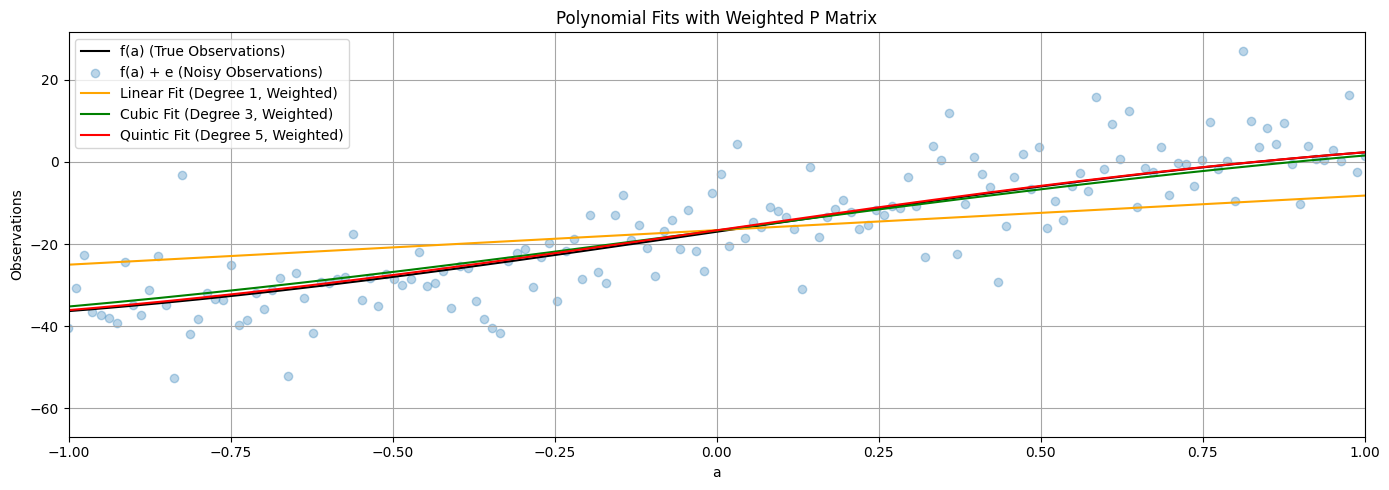

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# Step 6: Call the fit_polynomial_curve function and fetch the results with the new P matrix
degrees = [1, 3, 5]
results_weighted = {}

for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)  # Using the new weighted P matrix
    results_weighted[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'apv': apv,
        'residuals': v
    }
    # Print the results for each degree
    print(f"Degree {deg} (with weighted P matrix):")
    print(f"Coefficients: {x}")
    print(f"A Posteriori Variance Factor (APV): {apv}")
    print(f"Residuals: {v}")
    print()

# Step 7: Use the estimated coefficients and constants array 'a' to construct the polynomial functions
# For degree 1 (linear polynomial)
line_uw_weighted = np.polyval(np.flip(results_weighted[1]['coefficients']), a)

# For degree 3 (cubic polynomial)
cubic_uw_weighted = np.polyval(np.flip(results_weighted[3]['coefficients']), a)

# For degree 5 (quintic polynomial)
quintic_uw_weighted = np.polyval(np.flip(results_weighted[5]['coefficients']), a)


# Step 8: Plot the weighted polynomial functions, noisy observations, and true observations
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the true observations (l_true) as a black line
ax.plot(a, l_true, label="f(a) (True Observations)", color='k')

# Plot the noisy observations (l) as a scatter plot
ax.scatter(a, l, label="f(a) + e (Noisy Observations)", color='tab:blue', marker='o', alpha=0.3)

# Plot the polynomial fits with weighted P matrix
# Line polynomial (Degree 1) in orange
ax.plot(a, line_uw_weighted, label="Linear Fit (Degree 1, Weighted)", color='orange')

# Cubic polynomial (Degree 3) in green
ax.plot(a, cubic_uw_weighted, label="Cubic Fit (Degree 3, Weighted)", color='green')

# Quintic polynomial (Degree 5) in red
ax.plot(a, quintic_uw_weighted, label="Quintic Fit (Degree 5, Weighted)", color='red')

# Set the x-axis and y-axis labels
ax.set_xlabel("a")
ax.set_ylabel("Observations")

# Set the x-axis range to be from -1 to 1
ax.set_xlim(-1, 1)

# Add a title
ax.set_title("Polynomial Fits with Weighted P Matrix")

# Add a legend
ax.legend()

# Add grid lines
ax.grid(True, which='both', ls='-', color='0.65')

# Adjust layout
fig.tight_layout()


# Step 9: Print the a posteriori variance factor for each polynomial function (with weighted P matrix)
print("A Posteriori Variance Factor (APV) with weighted P matrix:")
print(f"Degree 1 (Linear Fit): {results_weighted[1]['apv']}")
print(f"Degree 3 (Cubic Fit): {results_weighted[3]['apv']}")
print(f"Degree 5 (Quintic Fit): {results_weighted[5]['apv']}")

# Step 10: Compute and print the norm between the predicted observations and the true observations (with weighted P matrix)
norm_line_weighted = np.linalg.norm(line_uw_weighted - l_true)
norm_cubic_weighted = np.linalg.norm(cubic_uw_weighted - l_true)
norm_quintic_weighted = np.linalg.norm(quintic_uw_weighted - l_true)

print(f"Norm between predicted (Degree 1) and true observations (Weighted): {norm_line_weighted}")
print(f"Norm between predicted (Degree 3) and true observations (Weighted): {norm_cubic_weighted}")
print(f"Norm between predicted (Degree 5) and true observations (Weighted): {norm_quintic_weighted}")


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)

# Comparison of Results from Unweighted and Weighted LSE:

# A Posteriori Variance Factor (APV):
# In the unweighted LSE, the model treats all observations equally, even if some data points are noisier (less reliable) than others. This leads to a higher APV because noisy observations add more error to the fit.
# In the weighted LSE, the model knows which observations are noisier (have higher variance) and gives them less influence. This results in a lower APV, meaning the model is fitting better because it's not trying to fit the noisy data as much.

# Norm (Predicted vs. True Observations):
# In the unweighted LSE, the norm is larger because the model is trying to fit all points equally, including the noisy ones. This can lead to a less accurate overall fit with the true data.
# In the weighted LSE, the norm is smaller because the model focuses more on the reliable observations (those with lower variance), leading to a better match with the true values.

# Phenomena Observed:
# Better Fit with Weighted LSE: In the weighted LSE, the model is smarter about which data to trust more. It pays more attention to the reliable data points and less to the noisy ones, which improves the overall fit. This is reflected in both the lower APV and the smaller norm.
# Less Influence from Noisy Data: By reducing the impact of noisy observations, the weighted LSE avoids being distracted by unreliable data. This helps the model capture the true trend more accurately, instead of overfitting the noise.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

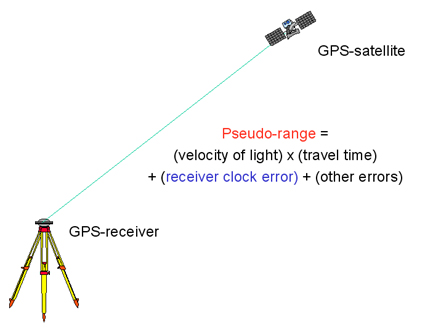

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [2]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)

from google.colab import drive
drive.mount('/content/drive')

df_pseudorange = pd.read_excel('/content/drive/MyDrive/ENGG680_2024_fall/Lab Assignment 2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/ENGG680_2024_fall/Lab Assignment 2/satellite_position.xlsx')

# Convert the DataFrames to NumPy arrays

# Pseudorange measurements as a NumPy array
pseudorange = df_pseudorange.to_numpy()

# Satellite positions as a NumPy array
sat_pos = df_sat_pos.to_numpy()


Mounted at /content/drive


In [3]:
# step 2
# define the number of measurements n and the number of states m
# (2 marks)

n = len(pseudorange)  # The number of pseudorange measurements (rows)
m = 4  # The number of states (x, y, z, and time bias)

In [4]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

# The variance of each observation is 1, so P is an identity matrix of size n x n
P = np.eye(n)  # Identity matrix of size n x n, where n is the number of measurements


In [5]:
# step 4
# set the initial states as zeros:
# (1 mark)

x_0 = np.zeros(m)  # A vector of size m (number of states), initialized to zero


In [6]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [7]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)

# Corrections array initialized as ones (size m)
delta = np.ones(m)

# Iteration counter initialized to zero
i = 0

# Initialize empty lists for storing values during iteration
arr_w = []        # To store weight matrices or results during iterations
arr_delta = []    # To store corrections (delta) at each iteration
arr_err_pos = []  # To store position error at each iteration
arr_i = []        # To store the iteration indices
x_hat = x_0.copy()  # Copy the initial state vector (x_0)

In [8]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)

def euclidean_norm(receiver_pos, satellite_pos):
    #"""
    #Compute the Euclidean distance between receiver and satellites.

    #Args:
        #receiver_pos (np.ndarray): The position of the receiver (1D array, e.g., [x, y, z]).
        #satellite_pos (np.ndarray): The positions of the satellites (2D array, each row is [x, y, z]).

    #Returns:
        #distance (np.ndarray): An array of distances between the receiver and each satellite.
    #"""

    # Use only the first three columns (x, y, z) of satellite_pos for the distance calculation
    #satellite_pos = satellite_pos[:, :3]

    # Calculate the Euclidean distance between receiver and each satellite
    distance = np.linalg.norm(satellite_pos - receiver_pos, axis=1)

    return distance


In [9]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)

def design_matrix(r_pos, s_pos, rho):
    """
    Compute the design matrix A for the LSE problem.

    Args:
        r_pos (np.ndarray): Estimated receiver position [x, y, z] (1D array).
        s_pos (np.ndarray): Satellite positions (2D array, each row is [x, y, z]).
        rho (np.ndarray): Geometric distances between receiver and satellites (1D array).

    Returns:
        A (np.ndarray): The design matrix A (2D array).
    """

    # Fill the design matrix
    A = np.zeros((n, m))
    for i in range(n):
        diff = s_pos[i, 1:] - r_pos[:3]
        A[i, :3] = -diff / rho[i]
        A[i, 3] = 1
    return A


In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
# Convergence criteria: corrections for x, y, z should be < 0.001 m
tolerance = 0.001


while np.linalg.norm(delta[:3]) > tolerance:


       # compute the geometric distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos[:, 1:])

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, sat_pos, rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange[:, 1] - (rho + x_hat[3])

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat += delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1
       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)


# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (w.T @ P @ w) / (n - m)


# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = np.linalg.inv(A.T @ P @ A)



In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

# After the LSE has converged, we print the following:
# - Estimated states (x_hat)
# - Corrections array (delta from the final iteration)
# - Estimated measurements residuals (misclosures, w)
# - A Posteriori Variance of Unit Weight (APV)
# - Covariance matrix of estimated states (C_x_hat)
# - Number of iterations (i)
# - 3-D position errors (err_pos)

print("\nLSE Results After Convergence:")
print("="*50)

# Print estimated states
print(f"Estimated States (x, y, z, time bias):\n{x_hat}")

# Print corrections array from the final iteration
print(f"\nCorrections Array (delta) from final iteration:\n{delta}")

# Print estimated measurements residuals (misclosures, w)
print(f"\nEstimated Measurements Residuals (w):\n{w}")

# Print A Posteriori Variance of Unit Weight (APV)
print(f"\nA Posteriori Variance of Unit Weight (APV): {apv}")

# Print Covariance matrix of estimated states
print(f"\nCovariance Matrix of Estimated States (C_x_hat):\n{C_x_hat}")

# Print number of iterations taken for convergence
print(f"\nNumber of Iterations: {i}")

# Print the 3-D position error (euclidean distance between estimated position and ground truth)
print(f"\nFinal 3-D Position Error: {err_pos} meters")


LSE Results After Convergence:
Estimated States (x, y, z, time bias):
[-1.63349244e+06 -3.65162954e+06  4.95248543e+06  6.47201389e+00]

Corrections Array (delta) from final iteration:
[ 3.23113755e-06  6.39397325e-06 -1.75963170e-05 -2.09206393e-05]

Estimated Measurements Residuals (w):
[ 0.25995968  0.11116656 -1.09951518 -0.00500947  0.2003028  -1.41816897
 -0.09127866  1.51207884  0.26364719  0.61137232 -0.34467609]

A Posteriori Variance of Unit Weight (APV): 0.8852888535930045

Covariance Matrix of Estimated States (C_x_hat):
[[ 0.31965006  0.06966245 -0.08457202 -0.07306881]
 [ 0.06966245  0.42546873 -0.58107148 -0.3682586 ]
 [-0.08457202 -0.58107148  2.04560159  1.10402067]
 [-0.07306881 -0.3682586   1.10402067  0.69925737]]

Number of Iterations: 5

Final 3-D Position Error: 5.431614722159558 meters


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

#The A Posteriori Variance of Unit Weight (APV) indicates how well the LSE model fits the data. If APV ≈ 1, the model fits well. APV > 1 suggests unexplained variance or noise in the data, while APV < 1 may indicate overfitting or overestimated variance.
#The Covariance Matrix of Estimated States shows the uncertainty in the estimated states. Smaller diagonal values indicate more precise estimates, while larger off-diagonal values suggest correlations between uncertainties in different states. The goal is to have small variances and minimal covariances for independent state estimates.

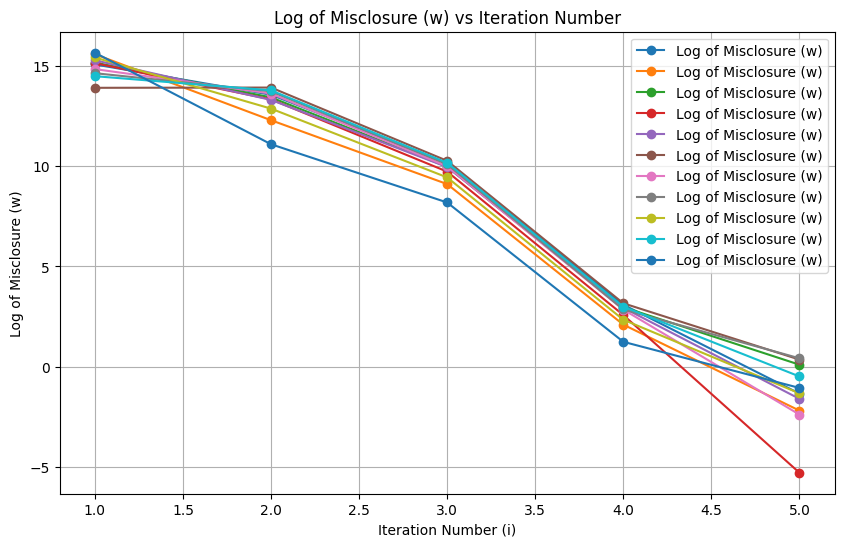

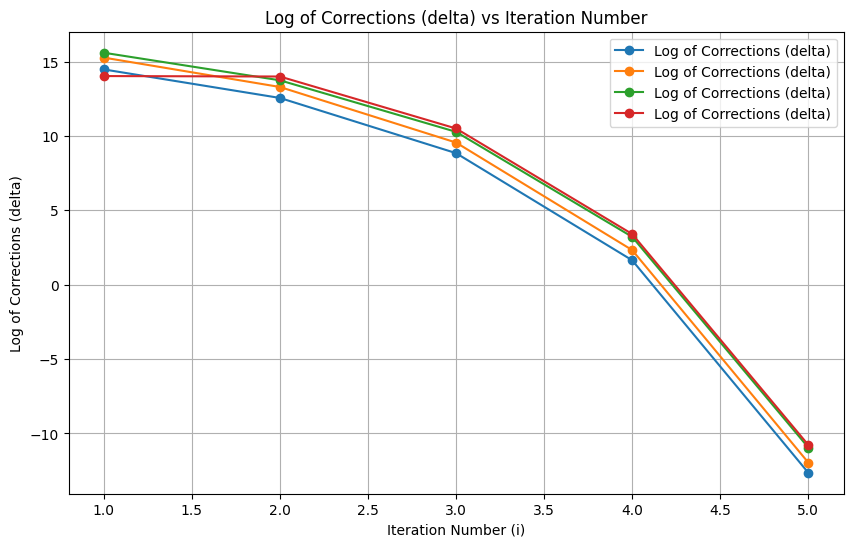

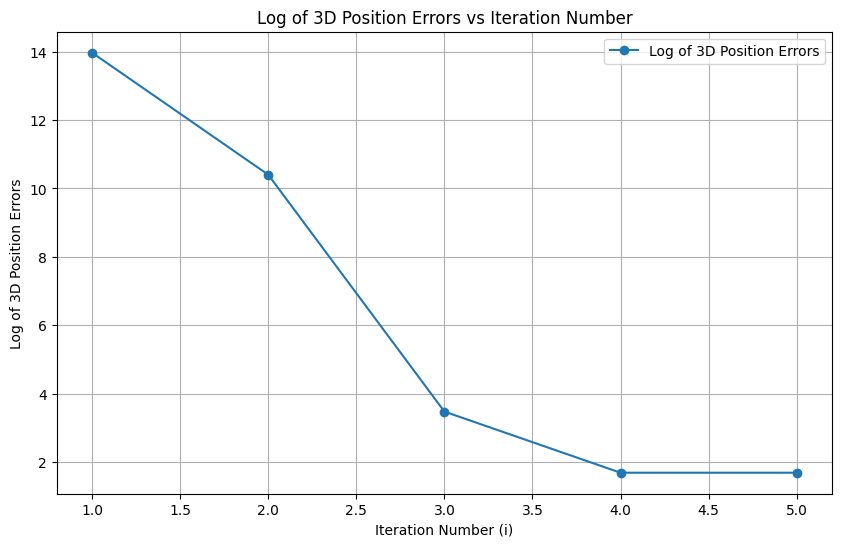

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
import matplotlib.pyplot as plt
import numpy as np

# Plotting the following:
# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log of Misclosure (w)', marker='o')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Misclosure (w)')
plt.title('Log of Misclosure (w) vs Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Log of Corrections (delta)', marker='o')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Corrections (delta)')
plt.title('Log of Corrections (delta) vs Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log of 3D Position Errors', marker='o')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of 3D Position Errors')
plt.title('Log of 3D Position Errors vs Iteration Number')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

#All three plots show a decreasing trend, indicating that the LSE process is converging effectively. Initially, large corrections and misclosures occur, but as the model adjusts, the corrections, misclosures, and position errors shrink, leading to accurate state estimates.

#1. Log of Misclosure (w) vs Iteration Number (i):
#Phenomenon: The log of the misclosure generally decreases with each iteration, showing a downward trend.
#Explanation: As the LSE process progresses, the difference between the observed pseudorange and the modeled pseudorange (misclosure) decreases. This indicates that the estimated states are gradually improving, leading to better alignment between the model and the observations. The misclosures approach zero as the model converges.

#2. Log of Corrections (delta) vs Iteration Number (i):
#Phenomenon: The log of the corrections (delta) shows a similar downward trend, decreasing sharply in the early iterations and leveling off as the iterations progress.
#Explanation: Large corrections are applied initially to adjust the estimated states. As the LSE converges, the necessary corrections become smaller, indicating that the estimates are approaching their optimal values. This behavior reflects the model stabilizing, with only minor adjustments required in later iterations.

#3. Log of 3D Position Errors vs Iteration Number (i):
#Phenomenon: The log of the 3D position errors decreases, showing the position estimates improving over iterations.
#Explanation: This decreasing trend indicates that the estimated receiver position is getting closer to the true position. As the LSE progresses, the error between the estimated and actual position reduces, meaning the model is converging towards an accurate solution.

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
